# 2020 RVATech/DataSummit Python Workshop
### Introduction to Data Analysis with Python

## Outline

1. File I/O and working with data in pandas
    * Reading, writing, and creating structured data in Python
    * Viewing, inspecting, and selecting data
2. Exploratory data analysis with pandas
    * Data cleaning
    * Summary statistics
    * Data transformations
    * Sorting, aggregation, joins and pivots
    * Data visualization

### Setup

In [1]:
!git clone https://github.com/CSSEGISandData/COVID-19
!awk '(NR == 1) || (FNR > 1)' COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/0[12]*.csv > covid_19_data.csv

Cloning into 'COVID-19'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 9903 (delta 14), reused 33 (delta 8), pack-reused 9863
Receiving objects: 100% (9903/9903), 39.71 MiB | 10.96 MiB/s, done.
Resolving deltas: 100% (4761/4761), done.


## 1. File I/O and working with data in pandas

### Reading Data

#### Python way

Opening a file and reading the content of a file is one of the common things you would do while doing data analysis.

One way of reading a text file and parsing each line is to use the python statement “readlines” on a file object:

If you want to read all lines of a file at the same time, Python’s readlines() function is for you. Python’s readlines function reads everything in the text file and has them in a list of lines. Here is an example of how to use Python’s readlines.

We first open the file using open() function in read only mode. And use the file handler from opening the file to read all lines using readlines() as follows.

In [2]:
# Open the file with read only permit
f = open('covid_19_data.csv', "r")

# use readlines to read all lines in the file
# The variable "lines" is a list containing all lines in the file
lines = f.readlines()

# close the file after reading the lines.
f.close() 
lines[:10]

['\ufeffProvince/State,Country/Region,Last Update,Confirmed,Deaths,Recovered\n',
 'Anhui,Mainland China,1/22/2020 17:00,1,,\n',
 'Beijing,Mainland China,1/22/2020 17:00,14,,\n',
 'Chongqing,Mainland China,1/22/2020 17:00,6,,\n',
 'Fujian,Mainland China,1/22/2020 17:00,1,,\n',
 'Gansu,Mainland China,1/22/2020 17:00,,,\n',
 'Guangdong,Mainland China,1/22/2020 17:00,26,,\n',
 'Guangxi,Mainland China,1/22/2020 17:00,2,,\n',
 'Guizhou,Mainland China,1/22/2020 17:00,1,,\n',
 'Hainan,Mainland China,1/22/2020 17:00,4,,\n']

We can also read all the lines of a file at once in another way. Basically, we would use the file handler object after opening the file as argument to list() function to get all the lines as a list.

In [3]:
# read all lines at once
f = open('covid_19_data.csv', "r")
lines = list(f)
f.close() 
lines[:10]

['\ufeffProvince/State,Country/Region,Last Update,Confirmed,Deaths,Recovered\n',
 'Anhui,Mainland China,1/22/2020 17:00,1,,\n',
 'Beijing,Mainland China,1/22/2020 17:00,14,,\n',
 'Chongqing,Mainland China,1/22/2020 17:00,6,,\n',
 'Fujian,Mainland China,1/22/2020 17:00,1,,\n',
 'Gansu,Mainland China,1/22/2020 17:00,,,\n',
 'Guangdong,Mainland China,1/22/2020 17:00,26,,\n',
 'Guangxi,Mainland China,1/22/2020 17:00,2,,\n',
 'Guizhou,Mainland China,1/22/2020 17:00,1,,\n',
 'Hainan,Mainland China,1/22/2020 17:00,4,,\n']

Note that the last character of each line is newline character.

Then you can go over the list of “lines” to parse each line. As you can immediately notice, “readlines” or “list(f) works great for a small text file. However, it is not memory efficient to use if your text files are really big. A better way to read a text file that is memory-friendly is to read the file line by line, that is one line at a time.

Here is the way to read text file one line at a time using “While” statement and python’s readline function. Since we read one line at a time with readline, we can easily handle big files without worrying about memory problems.

In [4]:
# Open the file with read only permit
f = open('covid_19_data.csv')

# use readline() to read the first line 
line = f.readline()

# use the read line to read further.
# If the file is not empty keep reading one line
# at a time, till the file is empty
line_number = 0
while line:
    if line_number < 10:
        print(line)
    line_number += 1
    # use readline() to read next line
    line = f.readline()
f.close()

﻿Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered

Anhui,Mainland China,1/22/2020 17:00,1,,

Beijing,Mainland China,1/22/2020 17:00,14,,

Chongqing,Mainland China,1/22/2020 17:00,6,,

Fujian,Mainland China,1/22/2020 17:00,1,,

Gansu,Mainland China,1/22/2020 17:00,,,

Guangdong,Mainland China,1/22/2020 17:00,26,,

Guangxi,Mainland China,1/22/2020 17:00,2,,

Guizhou,Mainland China,1/22/2020 17:00,1,,

Hainan,Mainland China,1/22/2020 17:00,4,,



Another variation of reading a file with while statement and readline statement is as follows. Here the while tests for boolean and read line by line until we reach the end of file and line will be empty.

In [5]:
# file handle fh
fh = open('covid_19_data.csv')
line_number = 0
while True:
    # read line
    line = fh.readline()
    
    if line_number < 10:
        print(line)
    line_number += 1
    
    # check if line is not empty
    if not line:
        break
fh.close()

﻿Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered

Anhui,Mainland China,1/22/2020 17:00,1,,

Beijing,Mainland China,1/22/2020 17:00,14,,

Chongqing,Mainland China,1/22/2020 17:00,6,,

Fujian,Mainland China,1/22/2020 17:00,1,,

Gansu,Mainland China,1/22/2020 17:00,,,

Guangdong,Mainland China,1/22/2020 17:00,26,,

Guangxi,Mainland China,1/22/2020 17:00,2,,

Guizhou,Mainland China,1/22/2020 17:00,1,,

Hainan,Mainland China,1/22/2020 17:00,4,,



One can also use an iterator to read a text file one line at time. Here is how to do it.

In [6]:
fh = open('covid_19_data.csv')
line_number = 0
for line in fh:
    if line_number < 10:
        print(line)
    line_number += 1
fh.close()

﻿Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered

Anhui,Mainland China,1/22/2020 17:00,1,,

Beijing,Mainland China,1/22/2020 17:00,14,,

Chongqing,Mainland China,1/22/2020 17:00,6,,

Fujian,Mainland China,1/22/2020 17:00,1,,

Gansu,Mainland China,1/22/2020 17:00,,,

Guangdong,Mainland China,1/22/2020 17:00,26,,

Guangxi,Mainland China,1/22/2020 17:00,2,,

Guizhou,Mainland China,1/22/2020 17:00,1,,

Hainan,Mainland China,1/22/2020 17:00,4,,



Remembering to close the file handler (“fh”) with the statement “fh.close()” can be difficult initially. One can check if a file handler is closed with

In [7]:
# check if the file file handler is closed or not
fh.closed
# true if the file handler is closed 

True

#### Pandas way

The goal of this tutorial is to learn the most popular Python library for data analysis, **pandas**. We will learn how to work with existing data, as well as how to create your own data.

**Pandas** is an open source library which is built on top of NumPy library, and which allows for fast analysis, data cleaning, and preparation of data efficiently.

In [8]:
#To start working with pandas, we need to import this library:
import pandas as pd

Most of the time, you will be probably working with data that already exists in variety of different formats.
By far the most basic of these are CSV or Excel files. This is how you read these files with pandas:

In [9]:
covid = pd.read_csv('covid_19_data.csv')
covid['ObservationDate'] = pd.to_datetime(covid['Last Update']).map(lambda x: x.date()).map(lambda x: str(x))

Let's pause here for a minute, and try to understand what exactly happens once we run **pandas.read_csv** command.

Two core objects in pandas are the **DataFrame** and the **Series**.

A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row and a column. The list of row labels used in a DataFrame is known as an Index.

In our example above, *covid* is a DataFrame created from 'covid_19_data.csv' file. 


In [10]:
#We can examine the contents of our DataFrame using the **head()** command:
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22


From this example, we can see that DataFrame entries are not limited to integers. For instance, the "0, Province?State" entry has the value of "Beijing", which is a string.

A Series, the second core pandas object, is a sequence of data values. If a DataFrame is a table, a Series is a list and,  in essence, it is a single column of a DataFrame.

In [11]:
#This is how we can see all the Series names in our DataFrame:
covid.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'ObservationDate'],
      dtype='object')

In [12]:
#The pd.read_csv() function has over 30 optional parameters you can specify. To learn more about them, run this line of code:
#?pd.read_csv

In [13]:
#You can also get the same information by running help on any function:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

For reference, here are list of commands you can use to import different data formats:

**pd.read_excel(filename)** - import from an Excel file

**pd.read_sql(query, connection_object)** - read from a SQL table/database

**pd.read_html(url)** - parses an html URL, string, or file and extracts tables to a s list of DataFrames

**pd.read_json(json_string)** - read from a JSON formatted string, URL, or file

**pd.read_clipboard()** - takes the contents of your clipboard and passes it to  *read_table()*

**pd.read_table(filename)** - import from an delimited text file (like TSV)

The [Pandas Documentation on file I/O](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) also has a wealth of additional information on reading and writing various file types. 

### Creating your own data

Sometimes you might need to be able to create a DataFrame or Series by hand.

The standard way of constructing a new DataFrame is by using the *pd.DataFrame()* constructor, where you provide a dictionary whose keys are the column names, and whose values are a list of entries:

In [14]:
pd.DataFrame({'Country': ['China', 'Italy', 'Iran'], 'Known Cases': ['80000', '2000' , '1500']})

,Country,Known Cases
0,China,80000
1,Italy,2000
2,Iran,1500


By default, this method assigns values to the column labels, and uses and ascending count (0, 1, 2,..) fro the row labels. If, instead, we want to assign labels ourselves, we can do it by adding an *index* option to DataFrame contructor:

In [15]:
pd.DataFrame({'Country': ['China', 'Italy', 'Iran'], 'Known Cases': ['80000', '2000' , '1500']}, \
             index = ['Observation 1', 'Observation 2', 'Observation 3'])

,Country,Known Cases
Observation 1,China,80000
Observation 2,Italy,2000
Observation 3,Iran,1500


We can create a Series by providing a list of values:

In [16]:
pd.Series(['Asia', 'Europe', 'North America', 'Australia/Oceania', 'South America', 'Antarctica', 'Africa'])

0                 Asia
1               Europe
2        North America
3    Australia/Oceania
4        South America
5           Antarctica
6               Africa
dtype: object

In [17]:
#or:
pd.Series(['Asia', 'Europe', 'North America', 'Australia'], name = 'Continents')

0             Asia
1           Europe
2    North America
3        Australia
Name: Continents, dtype: object

### Exporting data

Similar to *pd.read_csv()*, we can use *to_csv()* method when we need to export our dataframe to a CSV file:

In [18]:
#Let's give a name to our robots dataframe, and save it as a CSV file:
observations = pd.DataFrame({'Country': ['China', 'Italy', 'Iran'], 'Known Cases': ['80000', '2000' , '1500']}, \
             index = ['Observation 1', 'Observation 2', 'Observation 3'])
observations.to_csv("Observations.csv")

In [19]:
#We can save the same dataframe without headers and index:
observations.to_csv("Observations.csv", header=False, index=False)

In [20]:
#We can also save to a specified location:
#observations.to_csv(r'C:\Desktop\Observations.csv', index=False) 

Another popular format for output files is Excel. To export pandas dataframe to an Excel file, we can run a *to_excel()* method:

In [21]:
observations.to_excel("Observations.xlsx", index = False)

In [22]:
#To specify the tab name:
observations.to_excel("observations.xlsx", index = False, sheet_name='Tab_1')

Sometimes we have a need to export the results of our data analysis to more than one sheet in the workbook. In such case, it is necessary to specify an ExcelWriter object:

In [23]:
continents = pd.Series(['Asia', 'Europe', 'North America', 'Australia'], name = 'Continents')
with pd.ExcelWriter('Continents_Observations.xlsx') as writer:  
    continents.to_excel(writer, sheet_name='Continents')
    observations.to_excel(writer, sheet_name='Observations')

Just for the reference,  here is a couple of alternative methods to export data:

**your_dataframe_name.to_sql(table_name, connection_object)** - write to a SQL table

**your_dataframe_name.to_json(filename)** - write to a file in JSON format

## Viewing, inspecting, and selecting data

Let's return to our **covid** DataFrame. Remember - you can use *head()* method to view the first *n* rows:

In [24]:
covid.head(3)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22


In [25]:
#In a similar way, you can inspect last n rows with tail() method:
covid.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
2813,"Tempe, AZ",US,2020-02-25T21:23:03,1.0,0.0,1.0,2020-02-25
2814,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0,2020-02-29
2815,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0,2020-02-24
2816,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0,2020-02-24
2817,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0,2020-02-24


Pandas objects have a number of attributes enabling you to access the metadata. We can also use the **shape** attribute to check how large this DataFrame is:

In [26]:
covid.shape

(2818, 7)

This means that our DataFrame has 4247 records split across 8 different columns. 

To see list of all columns, use *columns* attribute:

In [27]:
covid.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'ObservationDate'],
      dtype='object')

There are two ways to access values in any column within the DataFrame. One is the following:

In [28]:
covid.ObservationDate.head()

0    2020-01-22
1    2020-01-22
2    2020-01-22
3    2020-01-22
4    2020-01-22
Name: ObservationDate, dtype: object

And another way is to use Python indexing (**[ ]**) operator:

In [29]:
covid['Last Update'].head()

0    1/22/2020 17:00
1    1/22/2020 17:00
2    1/22/2020 17:00
3    1/22/2020 17:00
4    1/22/2020 17:00
Name: Last Update, dtype: object

(The advantage of this way is that it handles column names with reserved characters in them.)

We can also select multiple columns by providing list of their names (this will return columns as a new DataFrame):

In [30]:
covid[['ObservationDate', 'Confirmed', 'Recovered']].head()

,ObservationDate,Confirmed,Recovered
0,2020-01-22,1.0,NaN
1,2020-01-22,14.0,NaN
2,2020-01-22,6.0,NaN
3,2020-01-22,1.0,NaN
4,2020-01-22,NaN,NaN


To look at a single specific value within Series, we need to use the indexing operator once more:

In [31]:
covid['Country/Region'][3]

'Mainland China'

In addition to Python-native indexing operator, pandas has its own operators, **loc** and **loc**. 

We use **iloc** to select data based on its numerical position. 

In [32]:
#Select first row of data:
covid.iloc[0]

Province/State               Anhui
Country/Region      Mainland China
Last Update        1/22/2020 17:00
Confirmed                        1
Deaths                         NaN
Recovered                      NaN
ObservationDate         2020-01-22
Name: 0, dtype: object

In [33]:
#If, instead, we want to get first column of data, we would use:
covid.iloc[:, 0].head()

0        Anhui
1      Beijing
2    Chongqing
3       Fujian
4        Gansu
Name: Province/State, dtype: object

We use **loc** for label-based selection:

In [34]:
covid.loc[:, ['ObservationDate', 'Country/Region', 'Confirmed']].head()

,ObservationDate,Country/Region,Confirmed
0,2020-01-22,Mainland China,1.0
1,2020-01-22,Mainland China,14.0
2,2020-01-22,Mainland China,6.0
3,2020-01-22,Mainland China,1.0
4,2020-01-22,Mainland China,NaN


Usually, data selection based on *conditions* provides the most interesting insights.

Let's take a look at Italy-related data:

In [35]:
covid[covid['Country/Region'] == 'Italy'].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
480,NaN,Italy,1/31/2020 23:59,2.0,NaN,NaN,2020-01-31
539,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0,2020-01-31
608,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-01-31
675,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-01-31
743,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-01-31


To see the number of confirmed cases in Italy as of March 1, we can use the apmersand (**&**) to bring the two questions together:

In [36]:
covid[(covid['Country/Region'] == 'Italy') & (covid['ObservationDate'] == '03/01/2020')].Confirmed

Series([], Name: Confirmed, dtype: float64)

If, instead, we are interested in seeing all the data related to California or Washington states in US, we would use a pipe (**|**):

In [37]:
covid[(covid['Country/Region'] == 'US') &
      ((covid['Province/State'] == 'Washington') | (covid['Province/State'] == 'California'))].head(7)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
31,Washington,US,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22
69,Washington,US,1/23/20 17:00,1.0,NaN,NaN,2020-01-23
117,Washington,US,1/24/20 17:00,1.0,NaN,NaN,2020-01-24
158,Washington,US,1/25/20 17:00,1.0,NaN,NaN,2020-01-25
202,Washington,US,1/26/20 16:00,1.0,NaN,NaN,2020-01-26
204,California,US,1/26/20 16:00,2.0,NaN,NaN,2020-01-26
249,Washington,US,1/27/20 23:59,1.0,NaN,NaN,2020-01-27


To get the same results, we might also use pandas built-in conditional selector **isin()**:

In [38]:
covid[(covid['Country/Region'] == 'US') & (covid['Province/State'].isin(['Washington', 'California'])) ].head(7)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
31,Washington,US,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22
69,Washington,US,1/23/20 17:00,1.0,NaN,NaN,2020-01-23
117,Washington,US,1/24/20 17:00,1.0,NaN,NaN,2020-01-24
158,Washington,US,1/25/20 17:00,1.0,NaN,NaN,2020-01-25
202,Washington,US,1/26/20 16:00,1.0,NaN,NaN,2020-01-26
204,California,US,1/26/20 16:00,2.0,NaN,NaN,2020-01-26
249,Washington,US,1/27/20 23:59,1.0,NaN,NaN,2020-01-27


### Assigning data

Sometimes we might want to re-write all the values within the Series. For example, we can create a new column "Source", and fill it in with "Trusted":

In [39]:
covid['Source'] = 'Trusted'
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate,Source
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,Trusted
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22,Trusted
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22,Trusted
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,Trusted
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22,Trusted


## 2. Exploratory data analysis with pandas

### Data cleaning

#### Remove unnecessary data

Now that we have covered some basics of data exporting and viewing, let's see how we can clean our sample dataset for further analysis.

First of all, let's delete the "Source" column we just created. To do this, we will use **drop()** method. Its *axis* parameter identifies whether we want to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’):

In [40]:
covid = covid.drop(['Source', 'Last Update'], axis = 1)
covid.head(2)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,ObservationDate
0,Anhui,Mainland China,1.0,NaN,NaN,2020-01-22
1,Beijing,Mainland China,14.0,NaN,NaN,2020-01-22


(Here, we also dropped 'Last Update' column since it was showing time in UTC at which the row is updated for the given province or country)

#### Rename columns

Sometimes, data sets we are working with come with column names or index names which are not very convenient. For example, we have 'Province/State' and 'Country/Region' columns which have special characters in their names, and also 'Last Update' column with a space in it. Let's rename them:

In [41]:
covid = covid.rename(columns = {'Province/State': 'Region', 'Country/Region': 'Country'})
covid.head()

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate
0,Anhui,Mainland China,1.0,NaN,NaN,2020-01-22
1,Beijing,Mainland China,14.0,NaN,NaN,2020-01-22
2,Chongqing,Mainland China,6.0,NaN,NaN,2020-01-22
3,Fujian,Mainland China,1.0,NaN,NaN,2020-01-22
4,Gansu,Mainland China,NaN,NaN,NaN,2020-01-22


#### Remove duplicated records

First, we check if there are any duplicated records usinf **duplicated()** method which returns boolean True/False values:

In [42]:
covid.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Of course we do not want to scrool through thousands of returned True/False. Instead, we can check for unique vaules:

In [43]:
covid.duplicated().unique()

array([False,  True])

Luckily for us, there are no duplicated records in our data set. Just for the reference, this is how the case with duplicates would look:

In [44]:
covid['Country'].duplicated().unique()

array([False,  True])

To remove duplicated records from the DataFrame, we would use the following syntax:

**df = df.drop_duplicates()**

To remove duplicates of only one or a subset of columns, we can specify *subset* as the individual column or list of columns that should be unique:

**df.drop_duplicates(subset = ['Column_1', 'Column_2'], keep = 'False')**

We can do the same task conditional on a different column’s value. In such case we can **sort_values()** first, and specify **keep** equals either first or last:

**df.sort_values('Column_1', ascending=False)**

**df = df.drop_duplicates(subset='Column_2', keep='first')**

#### Data types

We should also investigate data types within our dataframe. To do this, we use **dtype** (for a Series) or **dtypes** (for a DataFrame) attribute:

In [45]:
covid.dtypes

Region              object
Country             object
Confirmed          float64
Deaths             float64
Recovered          float64
ObservationDate     object
dtype: object

In [46]:
covid.Confirmed.dtype

dtype('float64')

Note that columns consisting entirely of strings do not get their own type in pandas; they are instead given the object type.

Sometimes we would like to convert a column of one type into another wherever such a conversion makes sense by using the astype() function. In our dataframe, we may transform the *Deaths* column from its existing float64 data type into a int64 data type:

In [47]:
covid.Deaths = covid.Deaths.fillna(0).astype('int64')
covid.dtypes

Region              object
Country             object
Confirmed          float64
Deaths               int64
Recovered          float64
ObservationDate     object
dtype: object

Also, to make work with dates easier, let's convert 'ObservationDate' column to pandas *datetime* object:

In [48]:
covid['ObservationDate'] = pd.to_datetime(covid.ObservationDate)

In [49]:
covid.dtypes

Region                     object
Country                    object
Confirmed                 float64
Deaths                      int64
Recovered                 float64
ObservationDate    datetime64[ns]
dtype: object

#### Convert strings to uppercase:

Many times, when we work with string data in our data set, it might be a good idea to convert all characters to uppercase and strip extra whitespaces before and after each string.

In [50]:
covid.head(2)

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate
0,Anhui,Mainland China,1.0,0,NaN,2020-01-22
1,Beijing,Mainland China,14.0,0,NaN,2020-01-22


Let's modify strings within the 'Province/State' and 'Country/Region' Series of our data set. To convert strings in the Series/Index to uppercase, we can use **upper()** method:

In [51]:
covid.Region = covid.Region.str.upper()
covid.Country = covid.Country.str.upper()

In [52]:
covid.head()

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate
0,ANHUI,MAINLAND CHINA,1.0,0,NaN,2020-01-22
1,BEIJING,MAINLAND CHINA,14.0,0,NaN,2020-01-22
2,CHONGQING,MAINLAND CHINA,6.0,0,NaN,2020-01-22
3,FUJIAN,MAINLAND CHINA,1.0,0,NaN,2020-01-22
4,GANSU,MAINLAND CHINA,NaN,0,NaN,2020-01-22


In [53]:
#To uppercase column names:
#df.columns = map(str.upper, df.columns)

To remove leading and trailing characters, we would use **strip()** method:

In [54]:
covid.Region = covid.Region.str.strip()
covid.Country = covid.Country.str.strip()

Note: Sometimes, we might want to remove leading (**lstrip()**) or trailing (**rstrip()**) characters only.

#### Missing values

Usually, when we work with real-world data, we always have some missing records. To find these missing values, also known as **NaN** (Not a Number), in our data set, we would use **isnull** method (or, alternatively, **notnull()** method which will select not empty values)

In [55]:
#Check which coumns in our data set have missing values:
covid.isnull().any()

Region              True
Country            False
Confirmed           True
Deaths             False
Recovered           True
ObservationDate    False
dtype: bool

In [56]:
covid[covid.Region.isnull()].head()

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate
35,NaN,JAPAN,2.0,0,NaN,2020-01-22
36,NaN,THAILAND,2.0,0,NaN,2020-01-22
37,NaN,SOUTH KOREA,1.0,0,NaN,2020-01-22
73,NaN,JAPAN,1.0,0,NaN,2020-01-23
74,NaN,THAILAND,3.0,0,NaN,2020-01-23


To perform data analysis, we would like to replace missing values, and pandas provides a really handy method for this problem: **fillna()**. 

In our case, we can simply replace each NaN with an 'Unknown':

In [57]:
covid['Region'] = covid['Region'].fillna('Unknown')
covid.iloc[36:40]

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate
36,Unknown,THAILAND,2.0,0,NaN,2020-01-22
37,Unknown,SOUTH KOREA,1.0,0,NaN,2020-01-22
38,ANHUI,MAINLAND CHINA,9.0,0,NaN,2020-01-23
39,BEIJING,MAINLAND CHINA,22.0,0,NaN,2020-01-23


Sometimes it makes sense to remove missing values from data set, and in that case we would use **dropna()** method. By default, **dropna()** will drop all rows in which any null value is present:

**df.dropna()**

We can also drop missing values along a different axis; *axis=1* drops all columns containing a null value.

### Summary statistics

Pandas provides some handy methods which allow us to see a high-level summary of data. We already familiar with one of these methods - **describe()**:

In [58]:
#Applied to numerical data:
covid.Confirmed.describe()

count     2799.000000
mean       611.108967
std       5038.673876
min          0.000000
25%          2.000000
50%         12.000000
75%        126.000000
max      66337.000000
Name: Confirmed, dtype: float64

In [59]:
#Applied to string data:
covid.Country.describe()

count               2818
unique                67
top       MAINLAND CHINA
freq                1203
Name: Country, dtype: object

For the reference, here are some others commonly used methods (they can be applies to a Series as well):

**df.describe()** - summary statistics for numerical columns

**df.mean()** - returns the mean of all columns

**df.corr()** - returns the correlation between columns in a DataFrame

**df.count()** - returns the number of non-null values in each DataFrame column

**df.max()** - returns the highest value in each column

**df.min()** - returns the lowest value in each column

**df.median()** - returns the median of each column

**df.std()** - returns the standard deviation of each column


To see a list of all unique values in certain Series, we would use the **unique()** method:

In [60]:
covid.Country.unique()

array(['MAINLAND CHINA', 'HONG KONG', 'MACAU', 'TAIWAN', 'US', 'JAPAN',
       'THAILAND', 'SOUTH KOREA', 'SINGAPORE', 'PHILIPPINES', 'MALAYSIA',
       'VIETNAM', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'COLOMBIA', 'FRANCE',
       'NEPAL', 'CANADA', 'CAMBODIA', 'SRI LANKA', 'IVORY COAST',
       'GERMANY', 'FINLAND', 'UNITED ARAB EMIRATES', 'INDIA', 'ITALY',
       'UK', 'RUSSIA', 'SWEDEN', 'SPAIN', 'BELGIUM', 'OTHERS', 'EGYPT',
       'IRAN', 'ISRAEL', 'LEBANON', 'IRAQ', 'OMAN', 'AFGHANISTAN',
       'BAHRAIN', 'KUWAIT', 'AUSTRIA', 'ALGERIA', 'CROATIA',
       'SWITZERLAND', 'PAKISTAN', 'GEORGIA', 'GREECE', 'NORTH MACEDONIA',
       'NORWAY', 'ROMANIA', 'DENMARK', 'ESTONIA', 'NETHERLANDS',
       'SAN MARINO', 'AZERBAIJAN', 'BELARUS', 'ICELAND', 'LITHUANIA',
       'NEW ZEALAND', 'NIGERIA', 'NORTH IRELAND', 'IRELAND', 'LUXEMBOURG',
       'MONACO', 'QATAR'], dtype=object)

**nunique()** will return a number of unique values:

In [61]:
covid.Country.nunique()

67

### Data transformations with 'map' and 'apply'

There are two methods in pandas which allow us to take one set of values and "map" them to another set. **map()** returns a new Series where all the values have been transformed.

Let's say we have noticed that 'Country' Series contains, among others, entries for 'Mainland China', 'Hong Kong', and 'Macau'. We know that they are all parts of Peaple's Republic of China, and would prefer to use 'China' for all of them. Here is how this can be done:

In [62]:
s = set(['MAINLAND CHINA', 'HONG KONG', 'MACAU'])
covid['GeneralCountry'] = covid.Country.map(lambda x: 'CHINA' if x in s else x)
covid.head()

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate,GeneralCountry
0,ANHUI,MAINLAND CHINA,1.0,0,NaN,2020-01-22,CHINA
1,BEIJING,MAINLAND CHINA,14.0,0,NaN,2020-01-22,CHINA
2,CHONGQING,MAINLAND CHINA,6.0,0,NaN,2020-01-22,CHINA
3,FUJIAN,MAINLAND CHINA,1.0,0,NaN,2020-01-22,CHINA
4,GANSU,MAINLAND CHINA,NaN,0,NaN,2020-01-22,CHINA


Here we used a small anonimous function (*lambda function*) which can take any number of arguments, but can only have one expression. Once the expression is executed, it returns the result.

In our example, this lambda function takes a single value from the 'Country' Series, and return a transformed version of that value. Then **map()** returns a new Series (which we called 'GeneralCountry' where all the values have been transformed by our labmda function.






**apply()** is a similar method which be applied both to Series and DataFrames. The difference is that **apply()** works on a row/column basis of a DataFrame, while **map()** works element-wise on a Series.


In [63]:
covid.Deaths.unique()

array([   0,   17,    1,   24,   40,   52,   76,  125,    2,  162,  204,
        249,  350,  414,  479,  549,  618,    3,  699,  780,    4,    5,
        871,    6,  974,    7, 1068,    8, 1310,   10,    9, 1457,   11,
       1596,   13, 1696, 1789,   16, 1921,   19, 2029,   12, 2144, 2346,
       2495, 2563, 2615, 2641,   20,   26, 2682,   21,   34, 2727,   29,
         43])

Let's create a function which calculates "naive" mortality rate, and write its output in a new 'MortalityRate' column using **apply()** method:

In [64]:
def naive_rate(x):
    if x.Confirmed > 0:
        return x.Deaths/x.Confirmed
    else:
        return 0
covid['MortalityRate'] = covid.apply(naive_rate, axis = 1)
covid[covid.MortalityRate != 0].head()

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate,GeneralCountry,MortalityRate
13,HUBEI,MAINLAND CHINA,444.0,17,28.0,2020-01-22,CHINA,0.038288
47,HEBEI,MAINLAND CHINA,1.0,1,NaN,2020-01-23,CHINA,1.000000
51,HUBEI,MAINLAND CHINA,444.0,17,28.0,2020-01-23,CHINA,0.038288
84,HUBEI,MAINLAND CHINA,549.0,24,31.0,2020-01-24,CHINA,0.043716
103,HEILONGJIANG,MAINLAND CHINA,4.0,1,NaN,2020-01-24,CHINA,0.250000


### Sorting 

In many cases, we would like to first sort values in our data set, and then perform further data manipulations. To sort data and get it in the desired order we can use **sort_values()** method.

In [65]:
covid.sort_values(by = 'GeneralCountry').head()

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate,GeneralCountry,MortalityRate
2258,Unknown,AFGHANISTAN,1.0,0,0.0,2020-02-24,AFGHANISTAN,0.0
2664,Unknown,AFGHANISTAN,1.0,0,0.0,2020-02-24,AFGHANISTAN,0.0
2782,Unknown,AFGHANISTAN,1.0,0,0.0,2020-02-24,AFGHANISTAN,0.0
2556,Unknown,AFGHANISTAN,1.0,0,0.0,2020-02-24,AFGHANISTAN,0.0
2452,Unknown,AFGHANISTAN,1.0,0,0.0,2020-02-24,AFGHANISTAN,0.0


**sort_values()** defaults to an ascending sort, where the lowest values go first. To obtain a descending sort, we need to specify *ascending* parameter: 

In [66]:
covid.sort_values(by = ['ObservationDate', 'Confirmed'], ascending = False).head(2)

,Region,Country,Confirmed,Deaths,Recovered,ObservationDate,GeneralCountry,MortalityRate
2699,HUBEI,MAINLAND CHINA,66337.0,2727,28993.0,2020-02-29,CHINA,0.041108
2700,Unknown,SOUTH KOREA,3150.0,16,27.0,2020-02-29,SOUTH KOREA,0.005079


### Grouping

Depending on our goals, we might prefer to group data first, and then perform some operations on this group. In pandas, we can do it with **groupby()** method. However, simple call of a *groupby* method on our data set will return not a set of DataFrames, but a DataFrameGroupBy object:

In [67]:
covid.groupby('GeneralCountry')

We can think of this object as of a special view of the DataFrame, which is already divided into groups. To get actual results, we need to apply an aggregate on this object:

In [68]:
#For example, we can check when the date of latest observation for each country:
covid.groupby('GeneralCountry').ObservationDate.max().head()

GeneralCountry
AFGHANISTAN   2020-02-24
ALGERIA       2020-02-25
AUSTRALIA     2020-02-29
AUSTRIA       2020-02-29
AZERBAIJAN    2020-02-28
Name: ObservationDate, dtype: datetime64[ns]

Similarly, we can use any of the summary functions with groupby object. For example, we can see latest numbers of confirmed cases within various regions of China:

In [69]:
covid[covid.GeneralCountry == 'CHINA'].groupby('Region').Confirmed.max()

Region
ANHUI               990.0
BEIJING             411.0
CHONGQING           576.0
FUJIAN              296.0
GANSU                91.0
GUANGDONG          1349.0
GUANGXI             252.0
GUIZHOU             146.0
HAINAN              168.0
HEBEI               318.0
HEILONGJIANG        480.0
HENAN              1272.0
HONG KONG            95.0
HUBEI             66337.0
HUNAN              1018.0
INNER MONGOLIA       75.0
JIANGSU             631.0
JIANGXI             935.0
JILIN                93.0
LIAONING            121.0
MACAU                10.0
NINGXIA              73.0
QINGHAI              18.0
SHAANXI             245.0
SHANDONG            756.0
SHANGHAI            337.0
SHANXI              133.0
SICHUAN             538.0
TIANJIN             136.0
TIBET                 1.0
XINJIANG             76.0
YUNNAN              174.0
ZHEJIANG           1205.0
Name: Confirmed, dtype: float64

We can also group by more than one column:

In [70]:
covid.groupby(['GeneralCountry', 'Region']).Deaths.max().head()

GeneralCountry  Region               
AFGHANISTAN     Unknown                  0
ALGERIA         Unknown                  0
AUSTRALIA       FROM DIAMOND PRINCESS    0
                NEW SOUTH WALES          0
                QUEENSLAND               0
Name: Deaths, dtype: int64

In [71]:
#Number of regions within each country:
covid.groupby('GeneralCountry').Region.nunique().head()

GeneralCountry
AFGHANISTAN    1
ALGERIA        1
AUSTRALIA      7
AUSTRIA        2
AZERBAIJAN     1
Name: Region, dtype: int64

In [72]:
covid.groupby('GeneralCountry')[['Confirmed', 'Deaths']].max().head(10)

,Confirmed,Deaths
GeneralCountry,,
AFGHANISTAN,1.0,0
ALGERIA,1.0,0
AUSTRALIA,9.0,0
AUSTRIA,9.0,0
AZERBAIJAN,1.0,0
BAHRAIN,41.0,0
BELARUS,1.0,0
BELGIUM,1.0,0
BRAZIL,2.0,0


**reset_index()** method allows to reset index:

In [73]:
covid.groupby('GeneralCountry')[['Confirmed', 'Deaths']].max().reset_index().head(10)

,GeneralCountry,Confirmed,Deaths
0,AFGHANISTAN,1.0,0
1,ALGERIA,1.0,0
2,AUSTRALIA,9.0,0
3,AUSTRIA,9.0,0
4,AZERBAIJAN,1.0,0
5,BAHRAIN,41.0,0
6,BELARUS,1.0,0
7,BELGIUM,1.0,0
8,BRAZIL,2.0,0
9,CAMBODIA,1.0,0


### Joining data

Often enough, while analyzing data, we need to combine different DataFrames and/or Series in non-trivial ways. Pandas has a few neat methods for doing this. 

In cases when we have data in different DataFrames (or Series) but having the same fields (columns), **concat()** function lets us join dataframes along axis.

Let's say we create a new DataFrame using *groupby()* method:

In [74]:
countries_stats = covid.groupby('GeneralCountry')[['Confirmed', 'Deaths']].max().reset_index()
countries_stats.head()

,GeneralCountry,Confirmed,Deaths
0,AFGHANISTAN,1.0,0
1,ALGERIA,1.0,0
2,AUSTRALIA,9.0,0
3,AUSTRIA,9.0,0
4,AZERBAIJAN,1.0,0


And pretend we have just heard of two new confirmed cases - one in Mongolia, and one in Jamaica:

In [75]:
new_cases = pd.DataFrame({'GeneralCountry': ['MONGOLIA', 'JAMAICA'], 'Confirmed': [1.0, 1.0], 'Deaths': [0, 0]})
new_cases

,GeneralCountry,Confirmed,Deaths
0,MONGOLIA,1.0,0
1,JAMAICA,1.0,0


Now if we would like to study all of the affected countries simultaneously, we would use **concat()** method to stack these two DataFrames on top of one another:

In [76]:
all_cases = pd.concat([countries_stats, new_cases])
all_cases.head()

,GeneralCountry,Confirmed,Deaths
0,AFGHANISTAN,1.0,0
1,ALGERIA,1.0,0
2,AUSTRALIA,9.0,0
3,AUSTRIA,9.0,0
4,AZERBAIJAN,1.0,0


In [77]:
#Check:
all_cases[all_cases.GeneralCountry == 'JAMAICA']

,GeneralCountry,Confirmed,Deaths
1,JAMAICA,1.0,0


To concat the same two DataFrames along columns, we would switch *axis* parameter to 1:

In [78]:
all_cases_too = pd.concat([countries_stats, new_cases], axis = 1)
all_cases_too.head()

,GeneralCountry,Confirmed,Deaths,GeneralCountry,Confirmed,Deaths
0,AFGHANISTAN,1.0,0,MONGOLIA,1.0,0.0
1,ALGERIA,1.0,0,JAMAICA,1.0,0.0
2,AUSTRALIA,9.0,0,NaN,NaN,NaN
3,AUSTRIA,9.0,0,NaN,NaN,NaN
4,AZERBAIJAN,1.0,0,NaN,NaN,NaN


**merge()** or **join()** methods let you combine different DataFrame objects which have an index in common (similar to a JOIN in SQL)

Let's create a new DataFrame listing countries and latest observation dates:

In [79]:
latest_data = covid.groupby(['GeneralCountry', 'Region']).ObservationDate.max().reset_index()
latest_data.head()

,GeneralCountry,Region,ObservationDate
0,AFGHANISTAN,Unknown,2020-02-24
1,ALGERIA,Unknown,2020-02-25
2,AUSTRALIA,FROM DIAMOND PRINCESS,2020-02-29
3,AUSTRALIA,NEW SOUTH WALES,2020-02-13
4,AUSTRALIA,QUEENSLAND,2020-02-29


Now we want to join this DataFrame with our original 'covid' DataFrame to get latest fatality rates:

In [80]:
latest_rates = pd.merge(latest_data, covid[['GeneralCountry', 'Region', 'ObservationDate', 'MortalityRate']], \
                        on=['GeneralCountry', 'Region', 'ObservationDate'])
latest_rates

,GeneralCountry,Region,ObservationDate,MortalityRate
0,AFGHANISTAN,Unknown,2020-02-24,0.0
1,AFGHANISTAN,Unknown,2020-02-24,0.0
2,AFGHANISTAN,Unknown,2020-02-24,0.0
3,AFGHANISTAN,Unknown,2020-02-24,0.0
4,AFGHANISTAN,Unknown,2020-02-24,0.0
...,...,...,...,...
528,VIETNAM,Unknown,2020-02-25,0.0
529,VIETNAM,Unknown,2020-02-25,0.0
530,VIETNAM,Unknown,2020-02-25,0.0
531,VIETNAM,Unknown,2020-02-25,0.0


We can also specify if we need inner, outer, right, or left join, as well as add a suffix to duplicate column names:

**pd.merge(df_1, df_2, on='ID', how='left', suffixes=('_1', '_2'))**

### Pivot tables

With pandas, we can also create a spreadsheet-style pivot table as a DataFrame:

In [81]:
pd.pivot_table(covid[['GeneralCountry', 'Region', 'ObservationDate', 'Confirmed']], \
               index=['GeneralCountry','Region'], aggfunc='max')

Confirmed  \
GeneralCountry Region                                                   
AFGHANISTAN    Unknown                                            1.0   
ALGERIA        Unknown                                            1.0   
AUSTRALIA      FROM DIAMOND PRINCESS                              8.0   
               NEW SOUTH WALES                                    4.0   
               QUEENSLAND                                         9.0   
...                                                               ...   
US             TRAVIS, CA                                         5.0   
               TRAVIS, CA (FROM DIAMOND PRINCESS)                 5.0   
               UNASSIGNED LOCATION (FROM DIAMOND PRINCESS)       44.0   
               WASHINGTON                                         1.0   
VIETNAM        Unknown                                           16.0   

                                                           ObservationDate  
GeneralCountry Region                                                       
AFGHANISTAN    Unknown                                          2020-02-24  
ALGERIA        Unknown                                          2020-02-25  
AUSTRALIA      FROM DIAMOND PRINCESS                            2020-02-29  
               NEW SOUTH WALES                                  2020-02-13  
               QUEENSLAND                                       2020-02-29  
...                                                                    ...  
US             TRAVIS, CA                                       2020-02-21  
               TRAVIS, CA (FROM DIAMOND PRINCESS)               2020-02-24  
               UNASSIGNED LOCATION (FROM DIAMOND PRINCESS)      2020-02-28  
               WASHINGTON                                       2020-01-31  
VIETNAM        Unknown                                          2020-02-25  

[139 rows x 2 columns]

### Data visualizations with pandas

When we want to quickly view how our data looks, pandas visualizations come in handy.

Let's look again at *all_cases* DataFrame we created some time ago:

In [82]:
all_cases.head()

,GeneralCountry,Confirmed,Deaths
0,AFGHANISTAN,1.0,0
1,ALGERIA,1.0,0
2,AUSTRALIA,9.0,0
3,AUSTRIA,9.0,0
4,AZERBAIJAN,1.0,0


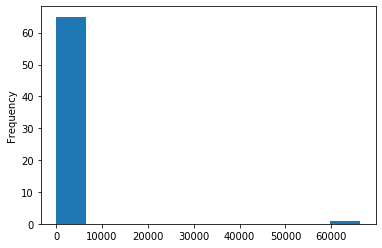

In [83]:
%matplotlib inline
all_cases.Confirmed.plot(kind = 'hist', bins = 10)

Look at growth of confirmed cases within US:

In [84]:
us = covid[covid.GeneralCountry == 'US'].groupby('ObservationDate').Confirmed.max().reset_index()
us.head(3)

,ObservationDate,Confirmed
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,1.0


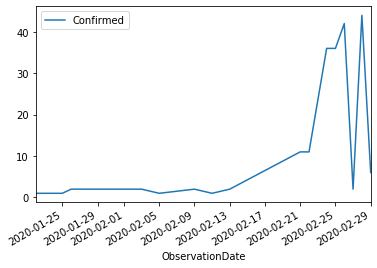

In [85]:
us.plot.line(x = 'ObservationDate', y = 'Confirmed')

Total cases by region within Mainland China:

In [86]:
china_regions = covid[covid.Country == 'MAINLAND CHINA'].groupby('Region')[['Confirmed', 'Deaths']].max()
china_regions.head()

,Confirmed,Deaths
Region,,
ANHUI,990.0,6
BEIJING,411.0,8
CHONGQING,576.0,6
FUJIAN,296.0,1
GANSU,91.0,2


Slightly fancier bar plot with matplotlib:

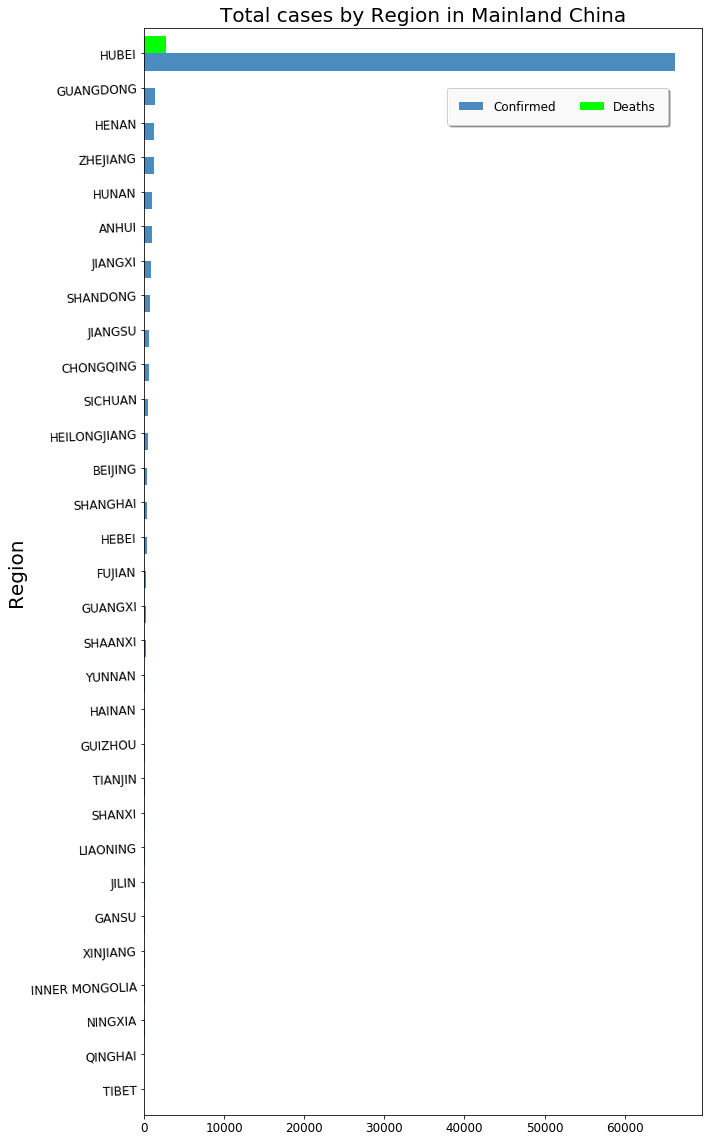

In [87]:
import matplotlib.pyplot as plt
china_regions.sort_values(by='Confirmed',ascending=True).plot(kind='barh', figsize=(10,20)
                                                            , color = ['#4b8bbe','lime','red']
                                                            , width=1
                                                            , rot=2)
# defyning legend and titles parameters
plt.title('Total cases by Region in Mainland China', size=20)
plt.ylabel('Region',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(bbox_to_anchor=(0.95,0.95) # setting coordinates for the caption box
           , frameon = True
           , fontsize = 12
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

All confirmed cases around the world:

In [88]:
by_country = covid.groupby('GeneralCountry')[['ObservationDate', 'Confirmed']].max().reset_index()
by_country.head(2)

,GeneralCountry,ObservationDate,Confirmed
0,AFGHANISTAN,2020-02-24,1.0
1,ALGERIA,2020-02-25,1.0


In [89]:
by_date = covid.groupby(['ObservationDate', 'GeneralCountry']).Confirmed.max().reset_index()
by_date.head()

,ObservationDate,GeneralCountry,Confirmed
0,2020-01-22,CHINA,444.0
1,2020-01-22,JAPAN,2.0
2,2020-01-22,SOUTH KOREA,1.0
3,2020-01-22,TAIWAN,1.0
4,2020-01-22,THAILAND,2.0


In [90]:
world = by_date.groupby('ObservationDate').Confirmed.sum().reset_index()
world.head()

,ObservationDate,Confirmed
0,2020-01-22,451.0
1,2020-01-23,454.0
2,2020-01-24,569.0
3,2020-01-25,792.0
4,2020-01-26,1098.0


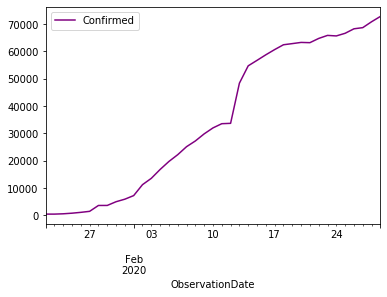

In [91]:
world.plot.line(x = 'ObservationDate', y = 'Confirmed', color = 'purple')